# РК 1

## Импортирование библиотек

In [341]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.count import CountEncoder as ce_CountEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
%matplotlib inline 
sns.set(style="ticks")

## Задача №1

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".

### Загрузка и предобработка данных

In [342]:
# загружаем датасет
data_loaded = pd.read_csv('data/hotel.csv', sep=",")
data_loaded.shape

(4000, 36)

In [343]:
data_loaded.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


In [344]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('additional_info', ('object', 808)),
 ('address', ('object', 0)),
 ('area', ('object', 35)),
 ('city', ('object', 0)),
 ('country', ('object', 0)),
 ('crawl_date', ('object', 0)),
 ('guest_recommendation', ('float64', 1584)),
 ('hotel_brand', ('object', 3611)),
 ('hotel_category', ('object', 0)),
 ('hotel_description', ('object', 17)),
 ('hotel_facilities', ('object', 194)),
 ('hotel_star_rating', ('int64', 0)),
 ('image_count', ('int64', 0)),
 ('latitude', ('float64', 0)),
 ('locality', ('object', 35)),
 ('longitude', ('float64', 0)),
 ('pageurl', ('object', 0)),
 ('point_of_interest', ('object', 240)),
 ('property_id', ('object', 0)),
 ('property_name', ('object', 0)),
 ('property_type', ('object', 0)),
 ('province', ('object', 0)),
 ('qts', ('object', 1284)),
 ('query_time_stamp', ('object', 0)),
 ('review_count_by_category', ('object', 1585)),
 ('room_area', ('object', 2872)),
 ('room_count', ('int64', 0)),
 ('room_facilities', ('object', 270)),
 ('room_type', ('object', 0)),
 ('

In [345]:
# Используем только некоторые признаки
cols_filter = ['uniq_id', 'property_name', 'property_type', 'city', 'crawl_date',
        'guest_recommendation', 'sitename']
data = data_loaded[cols_filter]
data.head()

,uniq_id,property_name,property_type,city,crawl_date,guest_recommendation,sitename
0,2c8db027d43a9452a43e88eb30d9f983,Baragarh Regency,Resort,Manali,2016-07-24,85.0,goibibo
1,e98f69f889c0235e6dc480e7df6de0de,Asian Suites A- 585,Guest House,Gurgaon,2016-07-24,87.0,goibibo
2,9b59d00eaffc273d83000ed7dcda0e83,Bevvan Resort,Resort,Goa,2016-07-24,50.0,goibibo
3,df0971f9c5501af112485ee28b468ce5,Apple Inn Cottage,Cottage,Manali,2016-07-24,100.0,goibibo
4,0c3514344c9cda8718f558e84bdb44ef,Anmol Hotel Pvt.Ltd,Hotel,Delhi,2016-07-24,63.0,goibibo


In [346]:
# Заполним пропуски средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)

impute_na(data, 'guest_recommendation', data['guest_recommendation'].mean())

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_3775/3897478908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable].fillna(value, inplace=True)


In [347]:
# Убедимся что нет пустых значений
data.isnull().sum()

uniq_id                 0
property_name           0
property_type           0
city                    0
crawl_date              0
guest_recommendation    0
sitename                0
dtype: int64

### Кодирование категорий с использованием метода "count (frequence) encoding"

In [348]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['uniq_id'])])

In [349]:
data_COUNT_ENC

,city,crawl_date,guest_recommendation,property_name,property_type,sitename
0,70,976,85.000000,1,516,4000
1,101,976,87.000000,1,243,4000
2,220,976,50.000000,1,516,4000
3,70,976,100.000000,1,75,4000
4,137,976,63.000000,1,2314,4000
...,...,...,...,...,...,...
3995,16,799,75.537666,1,2314,4000
3996,62,799,75.537666,2,2314,4000
3997,65,799,83.000000,1,2314,4000
3998,3,799,75.537666,2,2314,4000


In [350]:
data['property_type'].unique()

array(['Resort', 'Guest House', 'Cottage', 'Hotel', 'Homestay', 'Villa',
       'Palace', 'Lodge', 'Houseboat', 'Service Apartment', 'BnB',
       'Hostel', 'Bungalow', 'Tent', 'Luxury Yacht', 'Motel', 'Beach Hut',
       'Farm Stay'], dtype=object)

In [351]:
data_COUNT_ENC['property_type'].unique()

array([ 516,  243,   75, 2314,  231,   49,   11,  117,   78,  183,   10,
         46,   57,    3,    9,    2,    7])

In [352]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['uniq_id'])])

In [353]:
data_FREQ_ENC

,city,crawl_date,guest_recommendation,property_name,property_type,sitename
0,0.01750,0.24400,85.000000,0.00025,0.12900,1.0
1,0.02525,0.24400,87.000000,0.00025,0.06075,1.0
2,0.05500,0.24400,50.000000,0.00025,0.12900,1.0
3,0.01750,0.24400,100.000000,0.00025,0.01875,1.0
4,0.03425,0.24400,63.000000,0.00025,0.57850,1.0
...,...,...,...,...,...,...
3995,0.00400,0.19975,75.537666,0.00025,0.57850,1.0
3996,0.01550,0.19975,75.537666,0.00050,0.57850,1.0
3997,0.01625,0.19975,83.000000,0.00025,0.57850,1.0
3998,0.00075,0.19975,75.537666,0.00050,0.57850,1.0


In [354]:
data_FREQ_ENC['property_type'].unique()

array([1.290e-01, 6.075e-02, 1.875e-02, 5.785e-01, 5.775e-02, 1.225e-02,
       2.750e-03, 2.925e-02, 1.950e-02, 4.575e-02, 2.500e-03, 1.150e-02,
       1.425e-02, 7.500e-04, 2.250e-03, 5.000e-04, 1.750e-03])

## Задача №21

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

## Загрузка и предобработка данных

In [355]:
boston_dataset = load_breast_cancer()
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['Y'] = boston_dataset.target
data.shape

(569, 31)

In [356]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [357]:
# Нужно ли масштабирование
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [358]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [359]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [360]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((455, 30), (114, 30))

## Масштабирование по медиане

In [361]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.185611,0.079867,0.198031,0.286394,0.025900,0.178848,0.269521,0.287188,0.058043,0.149360,...,0.224773,0.030929,0.232531,0.341275,0.036347,0.220766,0.169480,0.152133,0.116675,0.189419
std,0.863737,0.763950,0.839923,0.971065,0.742954,0.806548,0.788212,0.722720,0.811073,0.838523,...,0.836201,0.711372,0.813818,1.001155,0.776613,0.819888,0.777289,0.681376,0.916555,0.875910
min,-1.565931,-1.621670,-1.467335,-1.124724,-2.284205,-1.118662,-0.608464,-0.623952,-2.165680,-1.375297,...,-1.217993,-1.549769,-1.144345,-0.881484,-2.045238,-0.962011,-0.844635,-1.035866,-1.862222,-1.212415
25%,-0.409314,-0.474245,-0.382648,-0.360927,-0.501849,-0.423183,-0.316195,-0.245670,-0.511834,-0.456057,...,-0.339100,-0.501157,-0.328167,-0.301037,-0.500000,-0.337155,-0.418033,-0.362807,-0.471111,-0.416101
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590686,0.525755,0.617352,0.639073,0.498151,0.576817,0.683805,0.754330,0.488166,0.543943,...,0.660900,0.498843,0.671833,0.698963,0.500000,0.662845,0.581967,0.637193,0.528889,0.583899
max,3.612745,3.630551,3.534739,5.380519,3.567353,3.860263,3.611430,3.123487,3.692308,4.263658,...,3.645329,2.792824,3.718576,6.273079,3.105442,4.409067,3.820045,1.980616,5.653333,6.181377


In [362]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

In [363]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

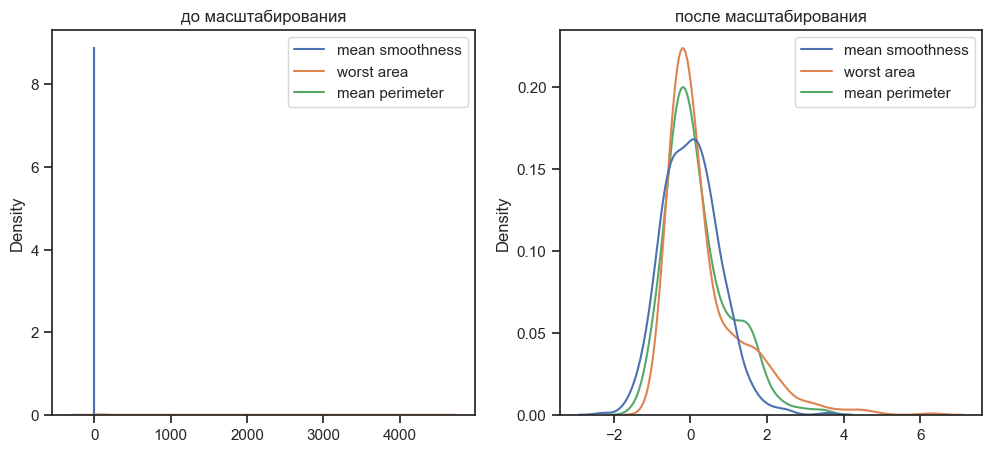

In [364]:
draw_kde(['mean smoothness', 'worst area', 'mean perimeter'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

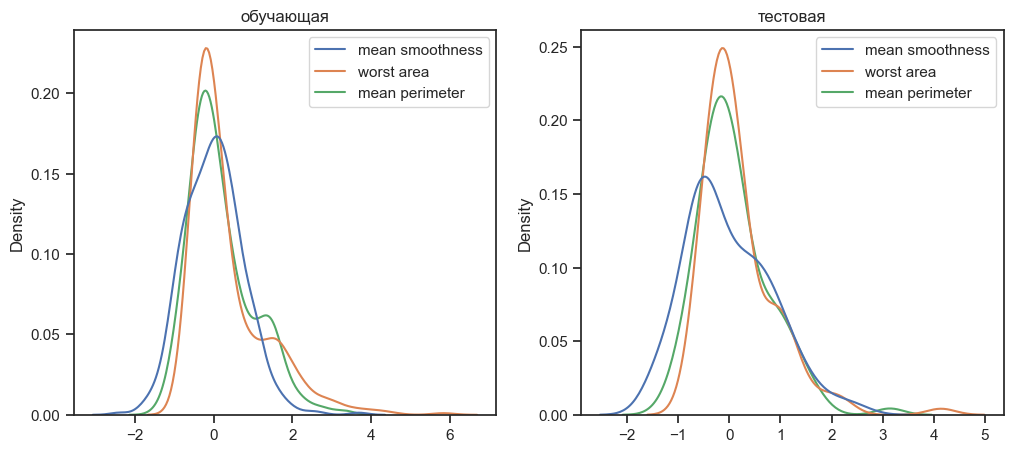

In [365]:
draw_kde(['mean smoothness', 'worst area', 'mean perimeter'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

## Доп задание
Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Axes: xlabel='mean smoothness'>

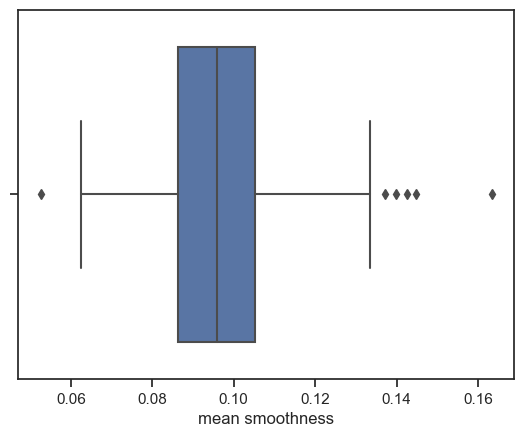

In [367]:
sns.boxplot(data=data, x="mean smoothness")